In [32]:
import scanpy as sc
import anndata as ad
import pandas as pd
import bbknn
import scanpy.external as sce
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
sc_adata = sc.read_h5ad("/gpfs/commons/groups/innovation/jjoseph/data/single_cell_Presenation/flex_pelka_moorman_harmony_donor_integrated.h5ad")
#old_sc = sc.read_h5ad("/gpfs/commons/home/slee/innovation/share/etc/Pelka_Moorman_integrated_051625.h5ad")

#Bin2Cell 
p2_adata_bin2cell = sc.read_h5ad("/gpfs/commons/groups/innovation/jjoseph/bin2cell_results/P2CRC/P2CRC_b2c_cells.h5ad")
p5_adata_bin2cell = sc.read_h5ad("/gpfs/commons/groups/innovation/jjoseph/bin2cell_results/P5CRC/P5CRC_b2c_cells.h5ad")


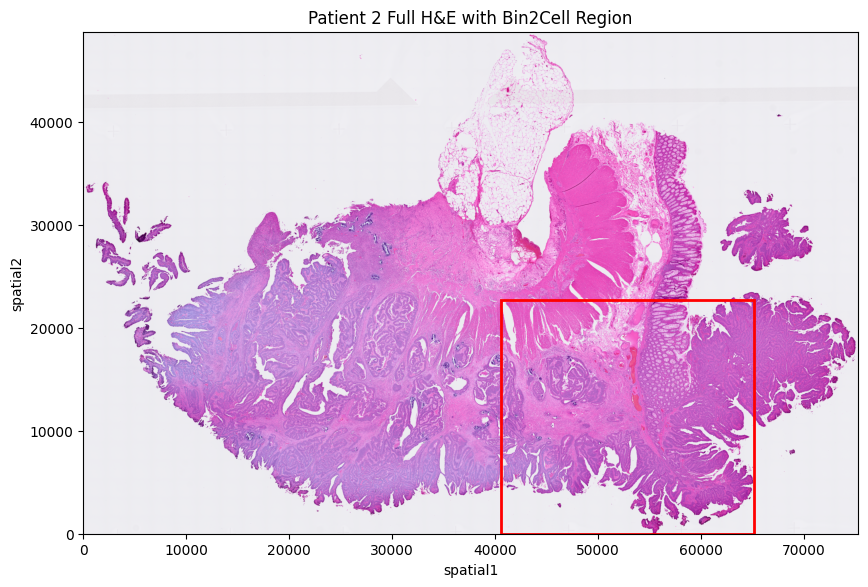

In [27]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Replace with your actual library ID
lib_id = list(p2_adata_bin2cell.uns["spatial"].keys())[0]

# Load image and scale
img = p2_adata_bin2cell.uns["spatial"][lib_id]["images"]["hires"]
scale = p2_adata_bin2cell.uns["spatial"][lib_id]["scalefactors"]["tissue_hires_scalef"]

# Get coords
coords = p2_adata_bin2cell.obsm["spatial"]

# Scale image dimensions to match coords
h, w = img.shape[:2]
extent = [0, w / scale, h / scale, 0]  # left, right, bottom, top

# Bounding box
x_min, x_max = coords[:, 0].min(), coords[:, 0].max()
y_min, y_max = coords[:, 1].min(), coords[:, 1].max()

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img, extent=extent)

# Overlay bin2cell spatial points
# ax.scatter(coords[:, 0], coords[:, 1], s=0.5, c="#00000000", alpha=0.2)

# Rectangle
rect = patches.Rectangle(
    (x_min, y_min),
    x_max - x_min,
    y_max - y_min,
    linewidth=2,
    edgecolor='red',
    facecolor='none'
)
ax.add_patch(rect)

ax.set_title("Patient 2 Full H&E with Bin2Cell Region")
ax.set_xlabel("spatial1")
ax.set_ylabel("spatial2")
ax.invert_yaxis()
plt.show()


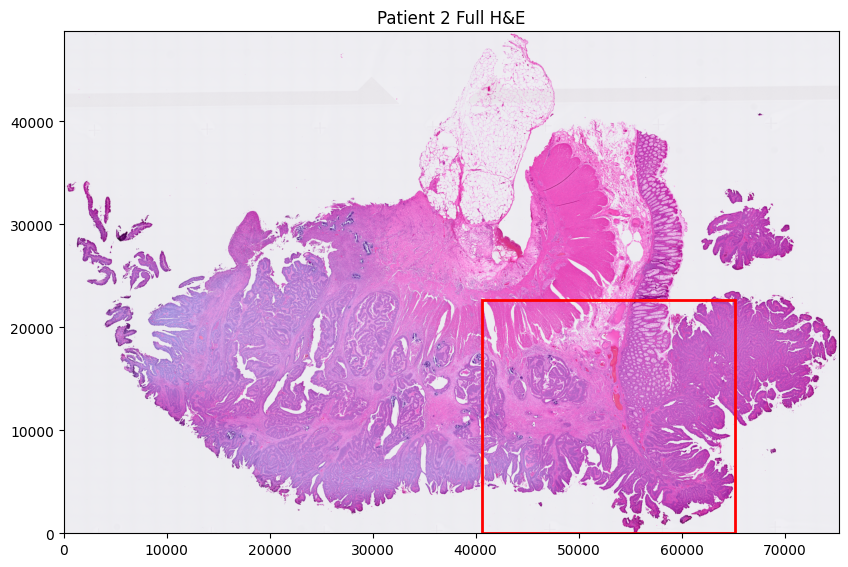

In [23]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Replace with your actual library ID
lib_id = list(p2_adata_bin2cell.uns["spatial"].keys())[0]

# Load image and scale
img = p2_adata_bin2cell.uns["spatial"][lib_id]["images"]["hires"]
scale = p2_adata_bin2cell.uns["spatial"][lib_id]["scalefactors"]["tissue_hires_scalef"]

# Get coords
coords = p2_adata_bin2cell.obsm["spatial"]

# Scale image dimensions to match coords
h, w = img.shape[:2]
extent = [0, w / scale, h / scale, 0]  # left, right, bottom, top

# Bounding box
x_min, x_max = coords[:, 0].min(), coords[:, 0].max()
y_min, y_max = coords[:, 1].min(), coords[:, 1].max()

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img, extent=extent)

# Overlay bin2cell spatial points
# ax.scatter(coords[:, 0], coords[:, 1], s=0.5, c="#00000000", alpha=0.2)

# Rectangle
rect = patches.Rectangle(
    (x_min, y_min),
    x_max - x_min,
    y_max - y_min,
    linewidth=2,
    edgecolor='red',
    facecolor='none'
)
ax.add_patch(rect)
ax.set_title("Patient 2 Full H&E")
ax.invert_yaxis()
plt.show()


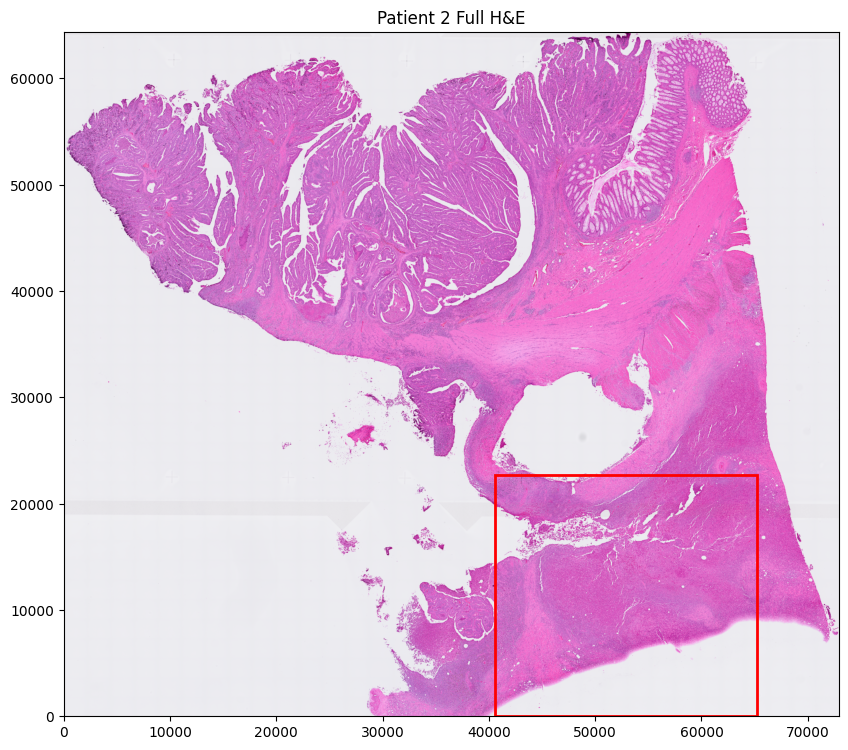

In [24]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Replace with your actual library ID
lib_id = list(p5_adata_bin2cell.uns["spatial"].keys())[0]

# Load image and scale
img = p5_adata_bin2cell.uns["spatial"][lib_id]["images"]["hires"]
scale = p5_adata_bin2cell.uns["spatial"][lib_id]["scalefactors"]["tissue_hires_scalef"]

# Get coords
coords = p2_adata_bin2cell.obsm["spatial"]

# Scale image dimensions to match coords
h, w = img.shape[:2]
extent = [0, w / scale, h / scale, 0]  # left, right, bottom, top

# Bounding box
x_min, x_max = coords[:, 0].min(), coords[:, 0].max()
y_min, y_max = coords[:, 1].min(), coords[:, 1].max()

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img, extent=extent)

# Overlay bin2cell spatial points
# ax.scatter(coords[:, 0], coords[:, 1], s=0.5, c="#00000000", alpha=0.2)

# Rectangle
rect = patches.Rectangle(
    (x_min, y_min),
    x_max - x_min,
    y_max - y_min,
    linewidth=2,
    edgecolor='red',
    facecolor='none'
)
ax.add_patch(rect)
ax.set_title("Patient 2 Full H&E")
ax.invert_yaxis()
plt.show()


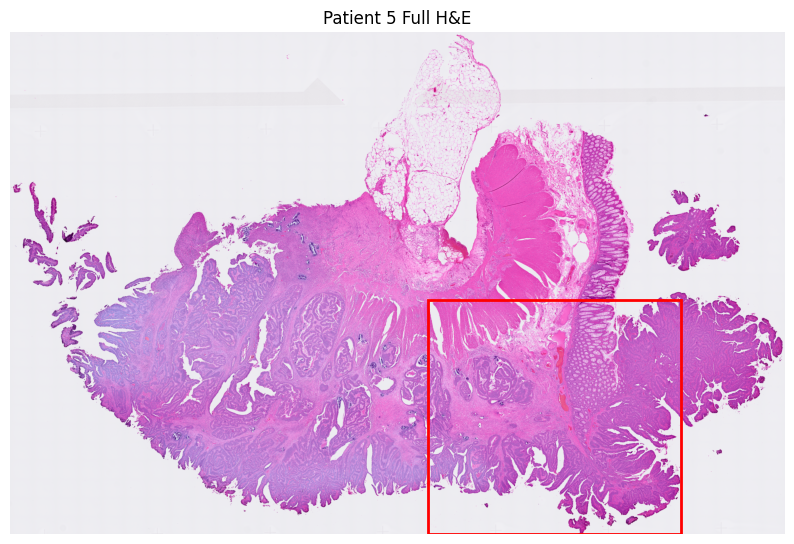

In [28]:
# Plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img, extent=extent, alpha=1)  # Adjust alpha as needed

# Rectangle
rect = patches.Rectangle(
    (x_min, y_min),
    x_max - x_min,
    y_max - y_min,
    linewidth=2,
    edgecolor='red',
    facecolor='none'
)
ax.add_patch(rect)

# Hide x and y axes
ax.axis('off')

# Maintain orientation
ax.invert_yaxis()
ax.set_title("Patient 5 Full H&E")
plt.show()


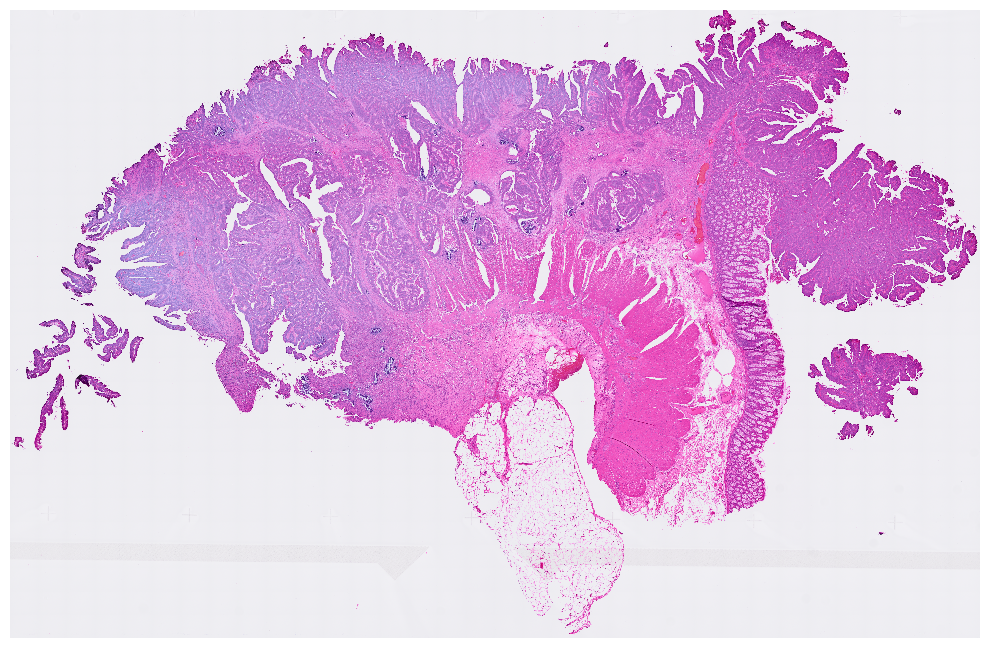

In [31]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Assume these are defined:
# img: your original image (e.g., shape (H, W, 3))
# coords: spatial coords (N x 2)
# scale: hires scalefactor (float)

# Scale spatial coords to image pixel space
scaled_coords = coords / scale
x_min, x_max = scaled_coords[:, 0].min(), scaled_coords[:, 0].max()
y_min, y_max = scaled_coords[:, 1].min(), scaled_coords[:, 1].max()

# Plot image at native resolution (no extent)
fig, ax = plt.subplots(figsize=(10, 10), facecolor='white')
ax.imshow(img, interpolation='none')  # Use native pixel resolution, no resampling

# Draw rectangle using scaled coordinates
rect = patches.Rectangle(
    (x_min, y_min),
    x_max - x_min,
    y_max - y_min,
    linewidth=2,
    edgecolor='red',
    facecolor='none'
)
ax.add_patch(rect)

# Clean axis
ax.axis('off')

# Ensure correct orientation (y-axis typically inverted in spatial plots)
ax.set_ylim(img.shape[0], 0)

plt.tight_layout()
plt.show()


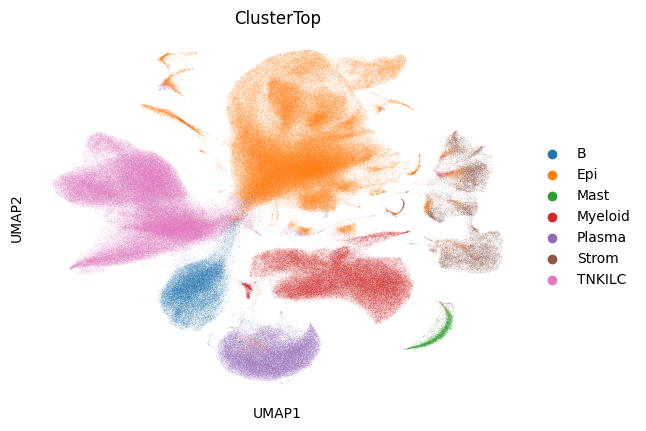

In [44]:
import scanpy as sc

# Create UMAP plot and return the figure
fig = sc.pl.umap(sc_adata, color=['ClusterTop'], return_fig=True)

# Remove box (spines)
for ax in fig.axes:
    for spine in ax.spines.values():
        spine.set_visible(False)

plt.show()


In [42]:
sc_adata.obs

biosample_id      donor_id  \
C103_T_1_1_0_c1_v2_id-AAACCTGCATGCTAGT  C103_T_1_1_0_c1_v2          C103   
C103_T_1_1_0_c1_v2_id-AAACCTGGTAGCCTAT  C103_T_1_1_0_c1_v2          C103   
C103_T_1_1_0_c1_v2_id-AAACCTGGTTGTCGCG  C103_T_1_1_0_c1_v2          C103   
C103_T_1_1_0_c1_v2_id-AAACCTGTCATGTGGT  C103_T_1_1_0_c1_v2          C103   
C103_T_1_1_0_c1_v2_id-AAACCTGTCCTTGGTC  C103_T_1_1_0_c1_v2          C103   
...                                                    ...           ...   
240628319074142_OKG146Li_IRI                           nan  OKG146Li_IRI   
240694997498614_OKG146Li_IRI                           nan  OKG146Li_IRI   
241097696763108_OKG146Li_IRI                           nan  OKG146Li_IRI   
241176048490355_OKG146Li_IRI                           nan  OKG146Li_IRI   
241184535657309_OKG146Li_IRI                           nan  OKG146Li_IRI   

                                       SpecimenType TissueSource  \
C103_T_1_1_0_c1_v2_id-AAACCTGCATGCTAGT            T          MGH   
C103_T_1_1_0_c1_v2_id-AAACCTGGTAGCCTAT            T          MGH   
C103_T_1_1_0_c1_v2_id-AAACCTGGTTGTCGCG            T          MGH   
C103_T_1_1_0_c1_v2_id-AAACCTGTCATGTGGT            T          MGH   
C103_T_1_1_0_c1_v2_id-AAACCTGTCCTTGGTC            T          MGH   
...                                             ...          ...   
240628319074142_OKG146Li_IRI                    nan          nan   
240694997498614_OKG146Li_IRI                    nan          nan   
241097696763108_OKG146Li_IRI                    nan          nan   
241176048490355_OKG146Li_IRI                    nan          nan   
241184535657309_OKG146Li_IRI                    nan          nan   

                                       ProcessingMethod PatientTypeID   sex  \
C103_T_1_1_0_c1_v2_id-AAACCTGCATGCTAGT         unsorted        C103_T  male   
C103_T_1_1_0_c1_v2_id-AAACCTGGTAGCCTAT         unsorted        C103_T  male   
C103_T_1_1_0_c1_v2_id-AAACCTGGTTGTCGCG         unsorted        C103_T  male   
C103_T_1_1_0_c1_v2_id-AAACCTGTCATGTGGT         unsorted        C103_T  male   
C103_T_1_1_0_c1_v2_id-AAACCTGTCCTTGGTC         unsorted        C103_T  male   
...                                                 ...           ...   ...   
240628319074142_OKG146Li_IRI                        nan           nan   nan   
240694997498614_OKG146Li_IRI                        nan           nan   nan   
241097696763108_OKG146Li_IRI                        nan           nan   nan   
241176048490355_OKG146Li_IRI                        nan           nan   nan   
241184535657309_OKG146Li_IRI                        nan           nan   nan   

                                        Site Grade TumorStage  ...  \
C103_T_1_1_0_c1_v2_id-AAACCTGCATGCTAGT  left   low      notT4  ...   
C103_T_1_1_0_c1_v2_id-AAACCTGGTAGCCTAT  left   low      notT4  ...   
C103_T_1_1_0_c1_v2_id-AAACCTGGTTGTCGCG  left   low      notT4  ...   
C103_T_1_1_0_c1_v2_id-AAACCTGTCATGTGGT  left   low      notT4  ...   
C103_T_1_1_0_c1_v2_id-AAACCTGTCCTTGGTC  left   low      notT4  ...   
...                                      ...   ...        ...  ...   
240628319074142_OKG146Li_IRI             nan   nan        nan  ...   
240694997498614_OKG146Li_IRI             nan   nan        nan  ...   
241097696763108_OKG146Li_IRI             nan   nan        nan  ...   
241176048490355_OKG146Li_IRI             nan   nan        nan  ...   
241184535657309_OKG146Li_IRI             nan   nan        nan  ...   

                                       Module Tumor ISC-like Score ClusterTop  \
C103_T_1_1_0_c1_v2_id-AAACCTGCATGCTAGT                         NaN        Epi   
C103_T_1_1_0_c1_v2_id-AAACCTGGTAGCCTAT                         NaN        Epi   
C103_T_1_1_0_c1_v2_id-AAACCTGGTTGTCGCG                         NaN        Epi   
C103_T_1_1_0_c1_v2_id-AAACCTGTCATGTGGT                         NaN        Epi   
C103_T_1_1_0_c1_v2_id-AAACCTGTCCTTGGTC                         NaN        Epi   
...                                     